c:\Users\krkac\Miniconda3\envs\sgpa-in-sr\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


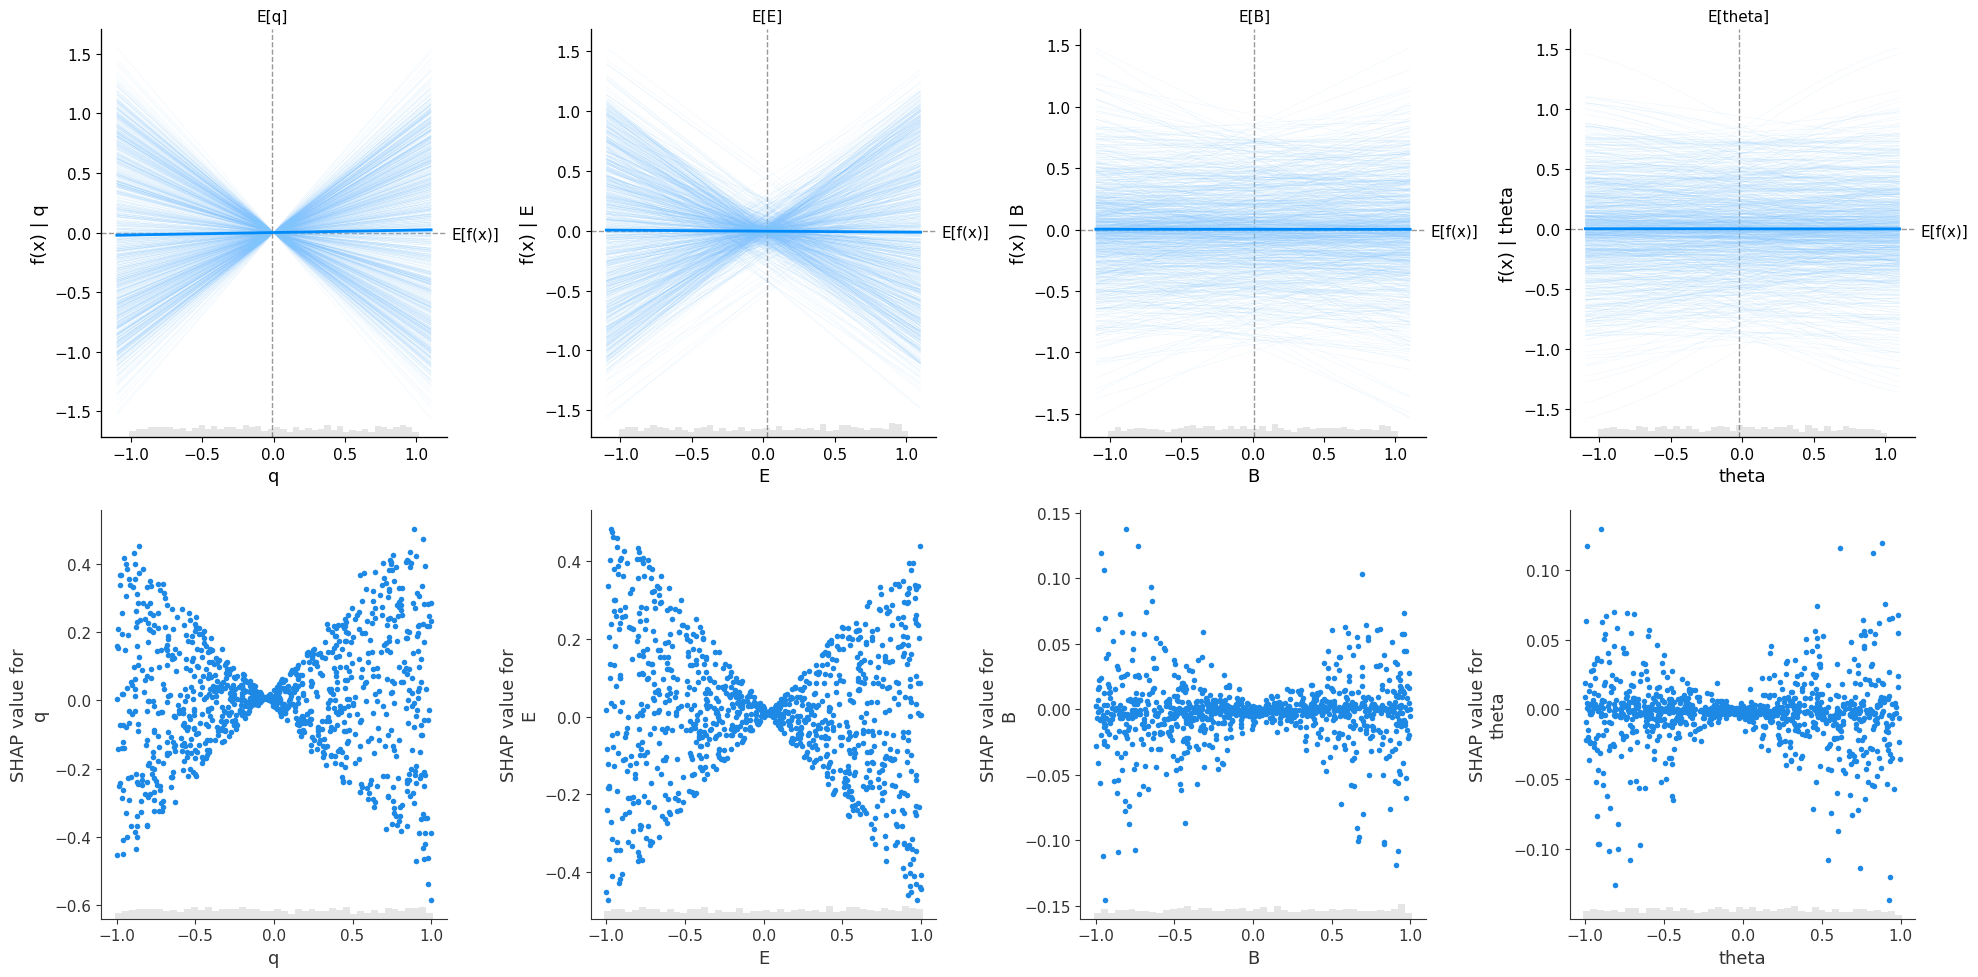

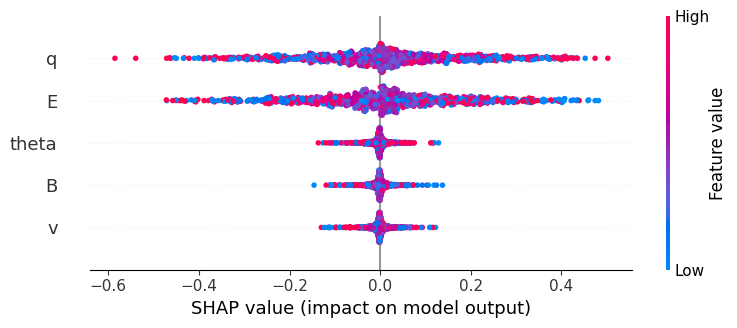

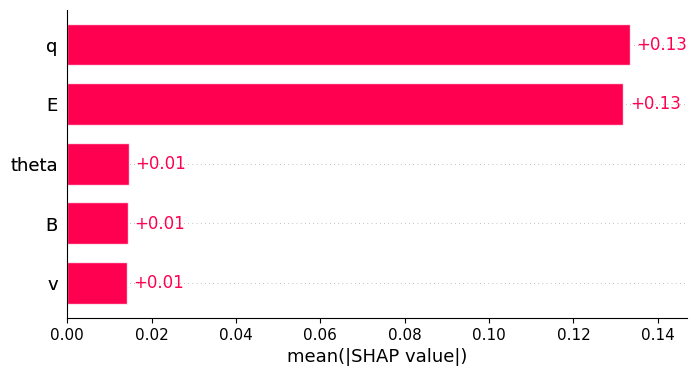

In [1]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
%matplotlib inline

# Define the number of samples
n_samples = 1000

# Create synthetic dataset
np.random.seed(0)
q = np.random.uniform(-1, 1, n_samples)
E = np.random.uniform(-1, 1, n_samples)
B = np.random.uniform(-1, 1, n_samples)
v = np.random.uniform(-1, 1, n_samples)
theta = np.random.uniform(-1, 1, n_samples)

# Compute the target variable using the given equation
F = q*(E + v * B * np.sin(theta))

# Create a DataFrame
df = pd.DataFrame({'q': q, 'E': E, 'B': B, 'v': v, 'theta': theta, 'F': F})

# Prepare the features and target variable
X = df[['q', 'E', 'B', 'v', 'theta']]
y = df['F']

# Define the model using the given equation
def model(X):
    X = X.values
    return X[:, 0] * (X[:, 1] + X[:, 3] * X[:, 2] * np.sin(X[:, 4]))

# Explain the model predictions using SHAP
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Create the figure and subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# First row: Partial dependence plots for different features
features = ['q', 'E', 'B', 'theta']
for i, feature in enumerate(features):
    # plt.subplot(3, 4, i + 1)
    # axes[0,i].set_title(f'Partial dependence plot for {feature}')
    plt.sca(axes[0,i])
    shap.partial_dependence_plot(feature, model, X, model_expected_value=True, feature_expected_value=True, show=False, ax=axes[0,i])

# Second row: Scatter plots for different features
for i, feature in enumerate(features):
    plt.sca(axes[1,i])
    shap.plots.scatter(shap_values[:, feature], show=False, ax=axes[1,i])

# Set the global font size for the plots
plt.rcParams.update({'font.size': 14})

plt.tight_layout()
plt.show()

shap.summary_plot(shap_values, X)
shap.plots.bar(shap_values)


